# SHARK ATTACK DATA

According to The New York Times (https://www.nytimes.com/2021/01/27/climate/sharks-population-study.html#:~:text=Oceanic%20sharks%20and%20rays%20have,according%20to%20a%20new%20study.), the population of sharks in the oceans have decreased for about 70% since 1970 mainly because of overfishing.

Since the number of sharks decreased, it is natural to think that the number of shark attacks will also decrease.

This notebook will study if there is any relashionship between the article and the number of worldwide shark attacks using to the shark attack dataframe from kaggle and bring some insights about it.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Importing DataFrame

In [2]:
shark = pd.read_csv('data/attacks.csv', encoding = 'latin1', sep = ',')

In [3]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
shark.shape

(25723, 24)

## Standardizing columns

In [5]:
pattern = r"[^a-zA-Z0-9]"
shark.columns = [re.sub(pattern, "_", column.lower()) for column in shark.columns]
shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed__22,unnamed__23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Initial evaluation

In [6]:
shark.groupby(by='year')[['case_number', 'date', 'type', 'activity', 'species_']].head()

,case_number,date,type,activity,species_
0,2018.06.25,25-Jun-2018,Boating,Paddling,White shark
1,2018.06.18,18-Jun-2018,Unprovoked,Standing,NaN
2,2018.06.09,09-Jun-2018,Invalid,Surfing,NaN
3,2018.06.08,08-Jun-2018,Unprovoked,Surfing,2 m shark
4,2018.06.04,04-Jun-2018,Provoked,Free diving,"Tiger shark, 3m"
...,...,...,...,...,...
6180,0000.0725,Ca. 725 B.C.,Sea Disaster,Shipwreck,NaN
6181,ND-0154,Before 1939,Unprovoked,Fishing,NaN
6302,0,NaN,NaN,NaN,NaN
6303,0,NaN,NaN,NaN,NaN


In [7]:
shark.groupby(by='year')['date'].unique()

year
0.0       [Ca. 214 B.C., Ca. 336.B.C.., 493 B.C., Ca. 72...
5.0                                            [Ca. 5 A.D.]
77.0                                             [77  A.D.]
500.0                                      [Circa 500 A.D.]
1543.0                                           [Ca. 1543]
                                ...                        
2014.0    [29-Dec-2014, 28-Dec-2014, Reported 23-Dec-201...
2015.0    [26-Dec-2015, 25-Dec-2015, 22-Dec-2015, 21-Dec...
2016.0    [27-Dec-2016, 24-Dec-2016, 19-Dec-2016, 14-Dec...
2017.0    [31-Dec-2017, 30-Dec-2017, 21-Dec-2017, 09-Dec...
2018.0    [25-Jun-2018, 18-Jun-2018, 09-Jun-2018, 08-Jun...
Name: date, Length: 249, dtype: object

In [8]:
agg_year = shark.groupby(by='year').agg(count_year = pd.NamedAgg(column = 'date', aggfunc='count'))
agg_year

,count_year
year,
0.0,125
5.0,1
77.0,1
500.0,1
1543.0,1
...,...
2014.0,127
2015.0,143
2016.0,130


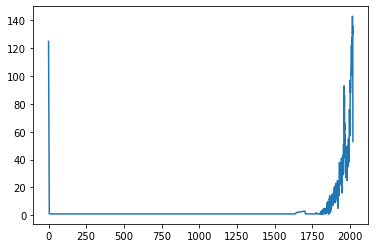

In [9]:
plt.plot(agg_year)

## Data Cleaning

### Drop duplicated values

In [10]:
shark.drop_duplicates(inplace=True)
shark

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed__22,unnamed__23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
shark_na = shark[['case_number', 'country', 'date', 'year', 'type', 'activity']].dropna(axis=0, how='any')
shark_na

,case_number,country,date,year,type,activity
0,2018.06.25,USA,25-Jun-2018,2018.0,Boating,Paddling
1,2018.06.18,USA,18-Jun-2018,2018.0,Unprovoked,Standing
2,2018.06.09,USA,09-Jun-2018,2018.0,Invalid,Surfing
3,2018.06.08,AUSTRALIA,08-Jun-2018,2018.0,Unprovoked,Surfing
4,2018.06.04,MEXICO,04-Jun-2018,2018.0,Provoked,Free diving
...,...,...,...,...,...,...
6296,ND.0006,AUSTRALIA,Before 1906,0.0,Unprovoked,Swimming
6297,ND.0005,AUSTRALIA,Before 1903,0.0,Unprovoked,Diving
6298,ND.0004,AUSTRALIA,Before 1903,0.0,Unprovoked,Pearl diving
6299,ND.0003,USA,1900-1905,0.0,Unprovoked,Swimming


### Droping invalid data

The type column has some invalid data that represents non shark attacks

In [12]:
shark_na['type'] = shark_na['type'].map(lambda x: x.lower())
mask_invalid = (shark_na['type'] != 'invalid')
valid_shark = shark_na[mask_invalid]
valid_shark

,case_number,country,date,year,type,activity
0,2018.06.25,USA,25-Jun-2018,2018.0,boating,Paddling
1,2018.06.18,USA,18-Jun-2018,2018.0,unprovoked,Standing
3,2018.06.08,AUSTRALIA,08-Jun-2018,2018.0,unprovoked,Surfing
4,2018.06.04,MEXICO,04-Jun-2018,2018.0,provoked,Free diving
5,2018.06.03.b,AUSTRALIA,03-Jun-2018,2018.0,unprovoked,Kite surfing
...,...,...,...,...,...,...
6296,ND.0006,AUSTRALIA,Before 1906,0.0,unprovoked,Swimming
6297,ND.0005,AUSTRALIA,Before 1903,0.0,unprovoked,Diving
6298,ND.0004,AUSTRALIA,Before 1903,0.0,unprovoked,Pearl diving
6299,ND.0003,USA,1900-1905,0.0,unprovoked,Swimming


### Here we will aim to get more reliable data.

Let's get data from 1970 onwards as reference to the article from The New York Times to see if the decrease of sharks is related to the number of shark attacks.

We will also drop the year of 2018 because it looks like the data is incomplete.

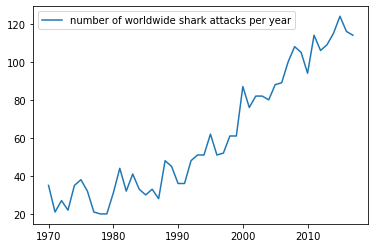

In [13]:
mask_year = (valid_shark['year'] >= 1970) & (valid_shark['year'] <= 2017) 
agg_year = valid_shark[mask_year].groupby(by='year')['date'].count()
plt.plot(agg_year)
plt.legend(['number of worldwide shark attacks per year'])

#### Let's get only the data from USA

In [38]:
valid_shark = valid_shark[mask_year]
valid_shark['country'] = valid_shark['country'].str.lower()
mask_country = valid_shark['country'] == 'usa'
shark_usa = valid_shark[mask_country]
shark_test = shark_usa.groupby(by='year')['case_number'].count()
shark_test = pd.DataFrame(shark_test).reset_index()
shark_test


C:\Users\mathe\AppData\Local\Temp/ipykernel_11920/3517789968.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_shark = valid_shark[mask_year]


,year,case_number
0,1970.0,8
1,1971.0,5
2,1972.0,8
3,1973.0,4
4,1974.0,13
5,1975.0,17
6,1976.0,17
7,1977.0,7
8,1978.0,9
9,1979.0,8


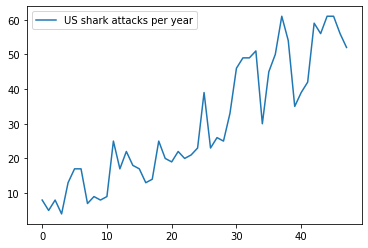

In [39]:
plt.plot(shark_test['case_number'])
plt.legend(['US shark attacks per year'])

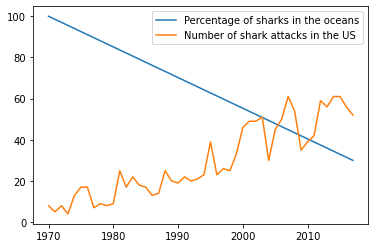

In [44]:
shark_population = pd.Series({1970 : 100, 2017 : 30})
plt.plot(shark_population.index, shark_population.values)
plt.plot(shark_test['year'], shark_test['case_number'])
plt.legend(['Percentage of sharks in the oceans', 'Number of shark attacks in the US'])

The graph above represents the fact that the number of shark attacks is not directly related to the number of shaks in the oceans.

Other theory is that the increase of shark attacks is related to to the human population growth.
So, let's compare that too.

## Comparing shark attacks to population growth

In [17]:
population = pd.read_csv('data/population.csv', decimal=',', thousands='.')
population.shape
population['us_pop'] = population['us_pop'].map(lambda x: int(re.sub(',','',x)))

In [18]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              48 non-null     int64  
 1   World Population  48 non-null     int64  
 2   Relative pop      48 non-null     float64
 3   us_pop            48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [19]:
population['us_pop_e-08'] = population['us_pop']*1e-08
population['us_pop_e-08']

0     3.297912
1     3.272102
2     3.246078
3     3.220340
4     3.193752
5     3.166513
6     3.138766
7     3.111828
8     3.085120
9     3.056949
10    3.027434
11    2.997531
12    2.968427
13    2.939479
14    2.911098
15    2.883503
16    2.854705
17    2.823986
18    2.791816
19    2.758350
20    2.723954
21    2.689843
22    2.656606
23    2.622736
24    2.587798
25    2.551753
26    2.515602
27    2.480837
28    2.449541
29    2.422878
30    2.398532
31    2.375128
32    2.351462
33    2.327663
34    2.303900
35    2.280014
36    2.256540
37    2.231400
38    2.204631
39    2.178814
40    2.154374
41    2.132700
42    2.112745
43    2.092780
44    2.073148
45    2.052384
46    2.029079
47    2.003283
Name: us_pop_e-08, dtype: float64

In [20]:
population = population.rename(columns={'Relative pop':'relative'})

In [21]:
population.head()

,Year,World Population,relative,us_pop,us_pop_e-08
0,2017,7547858925,100.000000,329791231,3.297912
1,2016,7464022049,98.889263,327210198,3.272102
2,2015,7379797139,97.773385,324607776,3.246078
3,2014,7295290765,96.653777,322033964,3.220340
4,2013,7210581976,95.531488,319375166,3.193752


In [22]:
population = population.reset_index().rename(columns={'Year':'year'})
shark_test = shark_test.reset_index()

In [23]:
shark_merged = shark_test.merge(population, on='year')

In [24]:
shark_merged['atk_pop'] = shark_merged['case_number']/(shark_merged['us_pop_e-08'])
shark_merged.head()

,year,case_number,index,World Population,relative,us_pop,us_pop_e-08,atk_pop
0,1970.0,8,47,3700437046,49.026314,200328340,2.003283,3.993444
1,1971.0,5,46,3775759617,50.024247,202907917,2.029079,2.464172
2,1972.0,8,45,3851650245,51.029706,205238390,2.052384,3.897906
3,1973.0,4,44,3927780238,52.038337,207314764,2.073148,1.929433
4,1974.0,13,43,4003794172,53.045429,209277968,2.092780,6.211834


<AxesSubplot:>

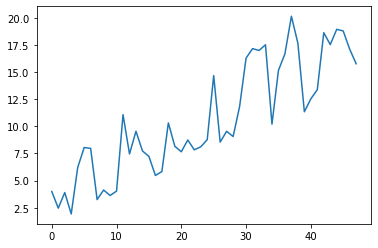

In [25]:
shark_merged['atk_pop'].plot()

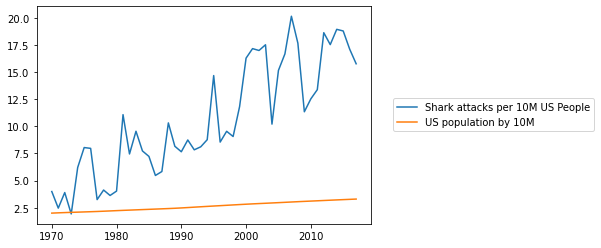

In [26]:
plt.plot(shark_merged['year'], shark_merged['atk_pop'])
plt.plot(shark_merged['year'], shark_merged['us_pop_e-08'])
plt.legend(["Shark attacks per 10M US People","US population by 10M"], 
           bbox_to_anchor = (1.05, 0.6)) 

It seems that the number of shark attacks have some type of relation with the human growth over the years.

### What if we look at the number of shark attacks just for fishing activities and analyse its relation to the population growth?

In [27]:
shark_usa.head()

,case_number,country,date,year,type,activity
53,2017.12.31,usa,31-Dec-2017,2017.0,unprovoked,Surfing
54,2017.12.30,usa,30-Dec-2017,2017.0,unprovoked,Surfing
60,2017.11.24,usa,24-Nov-2017,2017.0,unprovoked,Spearfishing
61,2017.11.18,usa,18-Nov-2017,2017.0,unprovoked,Surfing
67,2017.10.26,usa,26-Oct-2017,2017.0,unprovoked,Stand-Up Paddleboarding


In [28]:
#valid_shark = valid_shark[mask_year]
shark_usa['activity'] = shark_usa['activity'].str.lower()
shark_usa['activity']

C:\Users\mathe\AppData\Local\Temp/ipykernel_11920/3120202928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_usa['activity'] = shark_usa['activity'].str.lower()


53                      surfing
54                      surfing
60                 spearfishing
61                      surfing
67      stand-up paddleboarding
                 ...           
3383         floating on a raft
3385                   swimming
3386               scuba diving
3389                    fishing
3398                     wading
Name: activity, Length: 1423, dtype: object

In [29]:
shark_usa['activity'].value_counts()

surfing                                                528
swimming                                               188
wading                                                  83
fishing                                                 41
standing                                                38
                                                      ... 
swimming / wading                                        1
swimming /  boogie boarding                              1
surfing, fell off surfboard & stepped on the shark.      1
walking in shallows                                      1
shipwreck                                                1
Name: activity, Length: 261, dtype: int64

In [30]:
shark_usa.loc[shark_usa['activity'].str.contains('fishing', na = False), 'activity'] = 'fishing'
shark_usa['activity'].value_counts()

c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


surfing                                           528
swimming                                          188
fishing                                           142
wading                                             83
standing                                           38
                                                 ... 
wading, when he stepped on the shark                1
playing in the surf with his 2 dogs                 1
surfing, but standing in water alongside board      1
swimming / wading                                   1
shipwreck                                           1
Name: activity, Length: 221, dtype: int64

In [31]:
mask_fishing = shark_usa['activity'] == 'fishing'
fishing_attacks = shark_usa[mask_fishing]
fishing_attacks = fishing_attacks.groupby('year')['activity'].count().reset_index()
fishing_attacks.head()

,year,activity
0,1970.0,1
1,1972.0,2
2,1975.0,1
3,1976.0,3
4,1977.0,2


In [32]:
fishing_merged = fishing_attacks.merge(population, on = 'year')
fishing_merged

,year,activity,index,World Population,relative,us_pop,us_pop_e-08
0,1970.0,1,47,3700437046,49.026314,200328340,2.003283
1,1972.0,2,45,3851650245,51.029706,205238390,2.052384
2,1975.0,1,42,4079480606,54.048183,211274535,2.112745
3,1976.0,3,41,4154666864,55.044310,213270022,2.132700
4,1977.0,2,40,4229506060,56.035839,215437405,2.154374
5,1978.0,1,39,4304533501,57.029862,217881437,2.178814
6,1979.0,1,38,4380506100,58.036407,220463115,2.204631
7,1981.0,5,36,4536996762,60.109719,225654008,2.256540
8,1983.0,3,34,4699569304,62.263608,230389964,2.303900
9,1984.0,2,33,4784011621,63.382367,232766280,2.327663


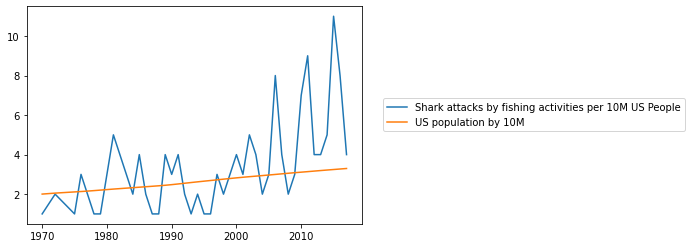

In [33]:
plt.plot(fishing_merged['year'], fishing_merged['activity'])
plt.plot(fishing_merged['year'], fishing_merged['us_pop_e-08'])
plt.legend(["Shark attacks by fishing activities per 10M US People","US population by 10M"], 
           bbox_to_anchor = (1.05, 0.6)) 

## Conclusion

Although it is intuitive to think that, if the number of sharks decreases, the numbers of attacks will also decrease, with this study was possible to observe that there are other factors that influence the number of shark attacks over the years.

The human population growth affects the increase of tourism, the increase of fishing, the decrease of available habitats for sharks etc.

Those factors are also impactful on the number of worldwid shark attacks, since they tend to concentrate where they can find more food.